# 1.   package install


In [1]:
!pip install praw
!pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.0 MB/s eta 0:00:00
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 4.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 6.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 2.8 MB/s eta 0:00:00
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade

In [54]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 590.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.9 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 4.1 MB/s eta 0:00:00a 0:00:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: regex
    Found existing installation: regex 2021.4.4
    Uninstalling regex-2021.4.4:
      Successfully uninstalled regex-2021.4.4
  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.1
    Uninstalling nltk-3.6.1:
      Successfully uninstalled nltk-3.6

# 2.   original notes

In [33]:
'''
from PRAW reddit scraper-Presentation.ipynb -- https://colab.research.google.com/drive/1N3qBoCWT7c5wz75LZNiaA-Nhu90iXONP#scrollTo=9hIZn6q5Sl1N
Dr. Sarah Ford
'''

submission=reddit.submission(id="51sb6r")
comment_list=[]
submission.comments.replace_more(limit=None)

for comment in submission.comments.list():
  if isinstance(comment,praw.models.MoreComments):
    continue

  print("ID", comment.id)
  print("Date",comment.created_utc)
  print("Author:", comment.author)
  print("Comment:",comment.body)
  print("Score:",comment.score)

  comment_list.append([comment.id,comment.created_utc,comment.author,comment.body,comment.score,])

df=pd.DataFrame(comment_list, columns=["ID","date","author","text","score"])
df.to_csv('r_apple_megathread_9_8_2016.csv',encoding='utf-8',index=False)

KeyboardInterrupt: 

In [ ]:
'''
from PRAW reddit scraper-Presentation.ipynb -- https://colab.research.google.com/drive/1N3qBoCWT7c5wz75LZNiaA-Nhu90iXONP#scrollTo=9hIZn6q5Sl1N
Dr. Sarah Ford
'''


## Sentiment

import pandas as pd
from textblob import TextBlob

# Function to perform sentiment analysis on each comment
def analyze_sentiment(df):
    sentiments = []

    for _, row in df.iterrows():
        blob = TextBlob(row['text'])
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        sentiments.append([row['ID'], polarity, subjectivity])

    df_sentiments = pd.DataFrame(sentiments, columns=['ID', 'Polarity', 'Subjectivity'])
    return df_sentiments

# Function to calculate average sentiment and subjectivity
def calculate_average_sentiment(df):
    average_polarity = round(df['Polarity'].mean(), 3)
    average_subjectivity = round(df['Subjectivity'].mean(), 3)
    return average_polarity, average_subjectivity

# Example usage
file_path = '/content/r_apple_megathread_9_8_2016.csv'
comments_df = pd.read_csv(file_path)
df_sentiments = analyze_sentiment(comments_df)
average_polarity, average_subjectivity = calculate_average_sentiment(df_sentiments)

print(f"Average Polarity: {average_polarity}, Average Subjectivity: {average_subjectivity}")

# Optionally, merge sentiment analysis back to the original DataFrame to see each comment's sentiment
comments_with_sentiment = comments_df.merge(df_sentiments, on='ID')
comments_with_sentiment.head()  # Prints the first few rows of the DataFrame with sentiment scores


In [9]:
# time converter
# https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

from datetime import datetime
ts = int('1284101485')

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


2010-09-10 06:51:25


# 3.   work produced from various sources
### [cited above]

In [3]:
# authenticates
import praw
reddit = praw.Reddit(
    client_id='g_ltpnl8YkmIrUOg4jeL-Q',
    client_secret='gevKvd3QC-ZBAuXKdbdbePvsh6GmpQ',
    password='universitY43',
    user_agent='testscript by u/dida_guy',
    username='dida_guy',
    check_for_async=False
)

In [4]:
# tests authentication with user name printout
print(reddit.user.me())

dida_guy


In [22]:
from praw.models import MoreComments
import pandas as pd
from datetime import datetime
import pandas as pd
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# changes mode to read only (can't edit reddit)
reddit.read_only = True


In [7]:
# evaluates read only condition
print(reddit.read_only)


True


In [8]:
# this gives info based on the subreddit
subreddit = reddit.subreddit("stocks")

print(subreddit.display_name)
# Output: redditdev
print(subreddit.title)
# Output: reddit development
print(subreddit.description)
# Output: a subreddit for discussion of ...


stocks
Stocks - Investing and trading for all
Almost any post related to stocks is welcome; please read the rules below:

[**If you're new here**](https://www.reddit.com/r/stocks/comments/4x1419/if_youre_new_here_read_this_post_first/)

##Resources

* [Wiki for new investors](https://www.reddit.com/r/stocks/wiki/index)

* [Pattern day trading](https://www.reddit.com/r/stocks/wiki/pdtrules)

* [Earnings calendar](https://finance.yahoo.com/calendar/earnings/)

##Karma requirements

[Click here to find how many days old your account needs to be and how much karma you need](https://www.reddit.com/r/stocks/wiki/karma) before you can comment or post to r/Stocks.

##Rules [(in depth rules wiki here)](https://www.reddit.com/r/stocks/wiki/rules)

1. Disclose any related open positions when discussing a particular stock or financial instrument.

2. Spam, ads, solicitations (including referral links), and self-promotion posts or comments will be removed and you might get banned.  Instead, [advert

In [9]:
# this takes r/stocks and searches for posts with keyword "icln"
subreddit = reddit.subreddit("stocks")
# icln is searched as a keyword, limit means number of posts
green_energy_posts = subreddit.search("icln", time_filter="all", limit=1000)
selected_IDs = []
for post in green_energy_posts:
    print("Title -", post.title)
    print("ID - ", post.id)
    print("Author -", post.author)
    print("Score -", post.score)
    print("Comment count = ", post.num_comments)
    print("Date Created", post.created_utc)
    print("\n")
    selected_IDs.append(post.id)


Title - Anyone loading up on ICLN?
ID -  17ccudc
Author - MedQ7
Score - 4
Comment count =  22
Date Created 1697812793.0


Title - Thoughts on ICLN? Just hit a 52 week low today
ID -  15t9ap2
Author - Retropixl
Score - 29
Comment count =  59
Date Created 1692237191.0


Title - What's your thought on ICLN for long term?
ID -  nlbzl1
Author - preciouscode96
Score - 176
Comment count =  115
Date Created 1622018105.0


Title - Your recommendation on clean energy ETFs (ICLN, TAN, PBD)
ID -  laon5f
Author - Pigeonman699
Score - 26
Comment count =  20
Date Created 1612244471.0


Title - Is it just me or is ICLN not convincing?
ID -  l11cw9
Author - UpgradeNotSure
Score - 92
Comment count =  113
Date Created 1611115771.0


Title - 🚀 ICLN above $30 for first time since 2008!
ID -  krqhqz
Author - thunderousqueef
Score - 1797
Comment count =  416
Date Created 1609948370.0


Title - Anyone else looking forward to ICLN’s rebalancing?
ID -  mg0ozt
Author - MedQ7
Score - 310
Comment count =  128
Date

Title - Recommendations for long term dca stocks or etfs
ID -  12bpuz3
Author - athlaka916
Score - 2
Comment count =  8
Date Created 1680628817.0


Title - Am I overdiversified for the size of my portfolio (roughly $5k)?
ID -  vqwsh4
Author - GreedyOlive4
Score - 25
Comment count =  81
Date Created 1656900657.0


Title - Recommend me green stocks
ID -  1474oim
Author - LivingWithWhales
Score - 0
Comment count =  48
Date Created 1686515985.0


Title - Are these ETFs good for long term(5-10 years or more)?
ID -  lnnvwb
Author - No_Rhubarb_2907
Score - 32
Comment count =  39
Date Created 1613761943.0


Title - $60k to invest for this year and withdraw at the beginning of next year.
ID -  kpmnyy
Author - drdeal10
Score - 28
Comment count =  87
Date Created 1609688542.0


Title - Energy ETF?
ID -  l1j4dl
Author - dkmoneynaut
Score - 7
Comment count =  9
Date Created 1611178417.0


Title - Why not create an all ETF portfolio?
ID -  ock4vt
Author - OutgoingHostility
Score - 154
Comment count 

Title - Energy Stocks
ID -  kjr6xm
Author - kevoo96
Score - 20
Comment count =  29
Date Created 1608861884.0


Title - Why are EV battery stocks so low right now?
ID -  15dk3pp
Author - Whalesftw123
Score - 79
Comment count =  73
Date Created 1690719111.0


Title - Which stock are you personally attached the most?
ID -  lodaja
Author - gorays21
Score - 125
Comment count =  335
Date Created 1613845700.0


Title - r/Stocks Daily Discussion & Technicals Tuesday - Dec 15, 2020
ID -  kdhor3
Author - AutoModerator
Score - 27
Comment count =  429
Date Created 1608019633.0


Title - Any green stocks poised to move that haven't already tripled in the past year?
ID -  lgezph
Author - TableGamer
Score - 4
Comment count =  23
Date Created 1612908979.0


Title - What would be a good 5th etf to add to this group?
ID -  kua2zd
Author - NewExpert2
Score - 5
Comment count =  20
Date Created 1610264017.0


Title - ETF's
ID -  i3xg6l
Author - kevoo96
Score - 13
Comment count =  28
Date Created 1596596073

In [10]:
len(selected_IDs)

221

In [25]:
'''
from PRAW reddit scraper-Presentation.ipynb -- https://colab.research.google.com/drive/1N3qBoCWT7c5wz75LZNiaA-Nhu90iXONP#scrollTo=9hIZn6q5Sl1N
Dr. Sarah Ford
'''

# This takes a post and scrapes for comments

# https://www.reddit.com/r/stocks/comments/ndo7u3/whats_causing_icln_to_gradually_decline_since_the/from datetime import datetime
from datetime import datetime

comment_list=[]

for id_tag in selected_IDs:
    submission=reddit.submission(id=id_tag) # id is found in the url as seen above
    submission.comments.replace_more(limit=10) # this limits the number of comments 
    for comment in submission.comments.list():
        if isinstance(comment,praw.models.MoreComments):
            continue
        ts = int(comment.created_utc)
        # this comment section is so remove unnecesary data to get it to load faster
#         print("ID", comment.id)
#         print("Date",datetime.utcfromtimestamp(ts).strftime('%Y-%m')) #this is reformatted time
#         print("Author:", comment.author)
#         print("Comment:",comment.body)
#         print("Score:",comment.score)

        comment_list.append([comment.id,datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d'),comment.created_utc,comment.author,comment.body,comment.score,])

df=pd.DataFrame(comment_list, columns=["ID","date","Unix Timestamp","author","text","score"])
df.to_csv('r_stocks_icln_megathread_04_04_2024.csv',encoding='utf-8',index=False)


In [26]:
## Sentiment


# this takes the comments of a post stored in r_stocks_icln_megathread_4_4_2024.csv and 
import pandas as pd
from textblob import TextBlob

# Function to perform sentiment analysis on each comment
def analyze_sentiment(df):
    sentiments = []

    for _, row in df.iterrows():
        blob = TextBlob(row['text'])
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        sentiments.append([row['ID'], polarity, subjectivity])

    df_sentiments = pd.DataFrame(sentiments, columns=['ID', 'Polarity', 'Subjectivity'])
    return df_sentiments

# Function to calculate average sentiment and subjectivity
def calculate_average_sentiment(df):
    average_polarity = round(df['Polarity'].mean(), 3)
    average_subjectivity = round(df['Subjectivity'].mean(), 3)
    return average_polarity, average_subjectivity

# Example usage
file_path = 'r_stocks_icln_megathread_04_04_2024.csv'
comments_df = pd.read_csv(file_path)
df_sentiments = analyze_sentiment(comments_df)
average_polarity, average_subjectivity = calculate_average_sentiment(df_sentiments)

print(f"Average Polarity: {average_polarity}, Average Subjectivity: {average_subjectivity}")

# Optionally, merge sentiment analysis back to the original DataFrame to see each comment's sentiment
comments_with_sentiment = comments_df.merge(df_sentiments, on='ID')
comments_with_sentiment.head()  # Prints the first few rows of the DataFrame with sentiment scores


Average Polarity: 0.085, Average Subjectivity: 0.346


,ID,date,Unix Timestamp,author,text,score,Polarity,Subjectivity
0,k5p426m,2023-10-20,1.697814e+09,creemeeseason,Look at the holdings of that fund. 51% utiliti...,17,-0.100000,0.450000
1,k5pehhr,2023-10-20,1.697817e+09,New-IncognitoWindow,Loaded up on calls after the election thinking...,5,-0.400000,0.650000
2,k5p55i4,2023-10-20,1.697814e+09,maceman10006,"No, just buy VTI and chill.",-11,0.000000,0.000000
3,k5p3ivq,2023-10-20,1.697813e+09,HelpsHolme,Maybe it's suffering because it's Only Propped...,-16,0.055556,0.666667
4,k5rwc01,2023-10-21,1.697853e+09,Invest0rnoob1,"I have some TAN leaps, averaged down a bit tod...",1,-0.077778,0.394444


In [27]:
comments_with_sentiment.to_csv('r_stocks_icln_megathread_sentimate_04_04_2024.csv',encoding='utf-8',index=False)


In [35]:
sentiment_df = pd.read_csv("r_stocks_icln_megathread_sentimate_04_04_2024.csv",low_memory=False)
sentiment_df.drop(['author','text','score','Subjectivity'],axis = 1, inplace = True)
sentiment_df.sample(10)
sentiment_df.sort_values("date", inplace=True)
sentiment_df

,ID,date,Unix Timestamp,Polarity
2988,e49vfo2,2018-08-16,1.534391e+09,1.000000
2985,e49tn2f,2018-08-16,1.534389e+09,0.164526
2984,e49sf27,2018-08-16,1.534388e+09,0.181488
2983,e49qo0h,2018-08-16,1.534386e+09,-0.033796
2982,e49s2ms,2018-08-16,1.534387e+09,0.160965
...,...,...,...,...
6266,kvvm15m,2024-03-21,1.711023e+09,0.000000
6265,kvviwws,2024-03-21,1.711022e+09,-0.050000
6242,kvzyfqq,2024-03-22,1.711080e+09,0.000000
6240,kw8f44y,2024-03-23,1.711220e+09,0.000000


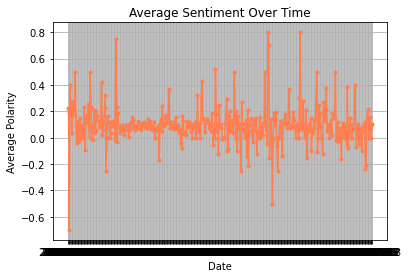

In [38]:
average_sentiment = sentiment_df.groupby('date')['Polarity'].mean().reset_index()

# Plotting the data
plt.plot(average_sentiment['date'], average_sentiment['Polarity'], marker='.', linestyle='-', color='coral')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.title('Average Sentiment Over Time')
plt.grid(True)
plt.show()



TypeError: float() argument must be a string or a number, not 'Period'

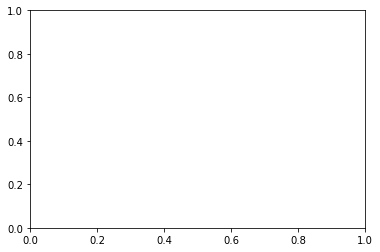

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'date' column to datetime format
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Grouping the data by month and calculating the average sentiment for each month
average_sentiment = sentiment_df.groupby(sentiment_df['date'].dt.to_period('M'))['Polarity'].mean().reset_index()

# Plotting the data
plt.plot(average_sentiment['date'], average_sentiment['Polarity'], marker='.', linestyle='-', color='coral')
plt.xlabel('Month')
plt.ylabel('Average Polarity')
plt.title('Average Sentiment Over Time')
plt.grid(True)
plt.show()


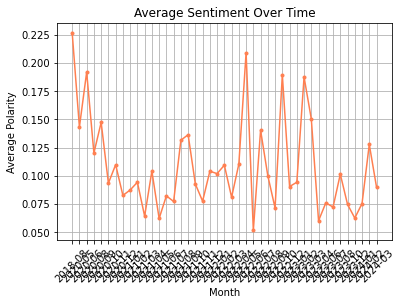

In [42]:
# Convert 'date' column to datetime format
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Grouping the data by month and calculating the average sentiment for each month
average_sentiment = sentiment_df.groupby(sentiment_df['date'].dt.to_period('m'))['Polarity'].mean().reset_index()

# Convert 'date' column to string
average_sentiment['date'] = average_sentiment['date'].astype(str)

# Plotting the data
plt.plot(average_sentiment['date'], average_sentiment['Polarity'], marker='.', linestyle='-', color='coral')
plt.xlabel('Month')
plt.ylabel('Average Polarity')
plt.title('Average Sentiment Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


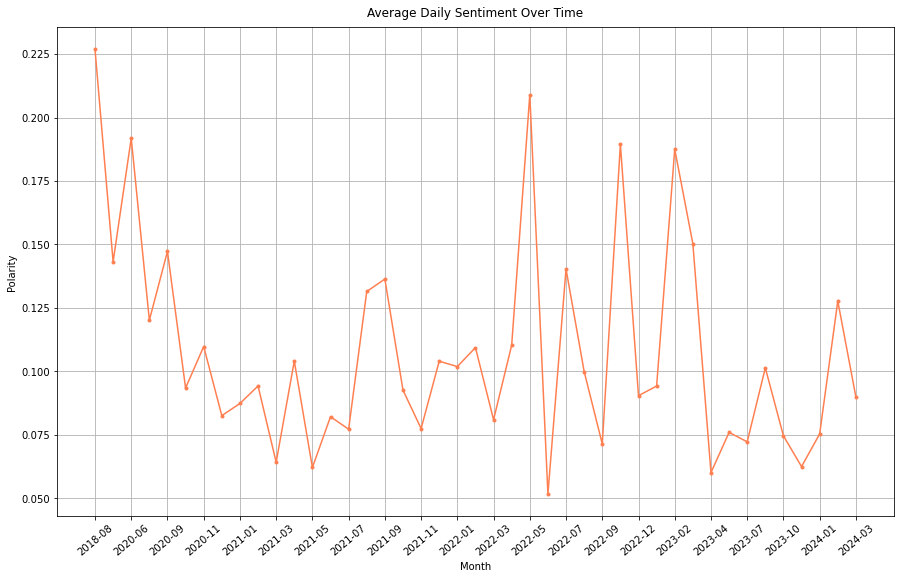

This line graph shows sentiment (averaged daily) within r/stocks of comments in posts that have ICLN in them. 
Polarity is a measurement of how positive a the comments were in a given day.


In [83]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

# Convert 'date' column to datetime format
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Grouping the data by month and calculating the average sentiment for each month
average_sentiment = sentiment_df.groupby(sentiment_df['date'].dt.to_period('M'))['Polarity'].mean().reset_index()

# Convert 'date' column to string
average_sentiment['date'] = average_sentiment['date'].astype(str)

# Plotting the data
plt.figure(figsize=(15, 9))
plt.plot(average_sentiment['date'], average_sentiment['Polarity'], marker='.', linestyle='-', color='coral')
plt.xlabel('Month')
plt.ylabel('Polarity')
plt.title('Average Daily Sentiment Over Time', pad=10)
plt.grid(True)


# Specify the frequency of x-axis ticks
plt.xticks(average_sentiment.index[::2], average_sentiment['date'].iloc[::2], rotation=40)  # Display every 2nd label

plt.savefig('average_sentiment.pdf')

plt.show()

print("This line graph shows sentiment (averaged daily) within r/stocks of comments in posts that have ICLN in them. \nPolarity is a measurement of how positive a the comments were in a given day.")

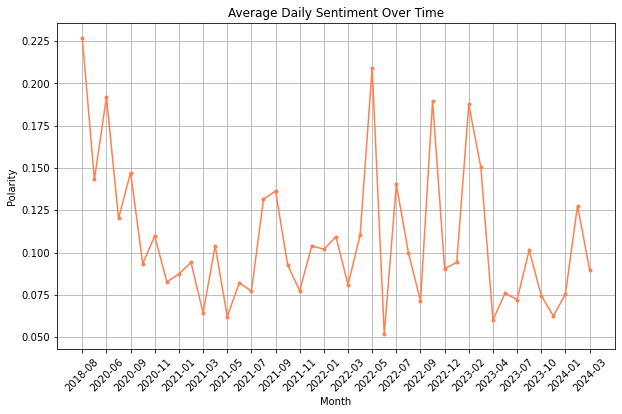

This line graph shows sentiment (averaged daily) within r/stocks of comments in posts that have ICLN in them. 
Polarity is a measurement of how positive the comments were in a given day.


In [81]:
# Convert 'date' column to datetime format
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Grouping the data by month and calculating the average sentiment for each month
average_sentiment = sentiment_df.groupby(sentiment_df['date'].dt.to_period('M'))['Polarity'].mean().reset_index()

# Convert 'date' column to string
average_sentiment['date'] = average_sentiment['date'].astype(str)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(average_sentiment['date'], average_sentiment['Polarity'], marker='.', linestyle='-', color='coral')
plt.xlabel('Month')
plt.ylabel('Polarity')
plt.title('Average Daily Sentiment Over Time')
plt.grid(True)

# Specify the frequency of x-axis ticks
plt.xticks(average_sentiment.index[::2], average_sentiment['date'].iloc[::2], rotation=45)  # Display every 3rd label

# Save the plot as a PDF
plt.savefig('average_sentiment.pdf')

# Display the plot
plt.show()

print("This line graph shows sentiment (averaged daily) within r/stocks of comments in posts that have ICLN in them. \nPolarity is a measurement of how positive the comments were in a given day.")
